# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/513818'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-02 00:16:41.837425: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 00:16:41.851202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 00:16:41.867210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 00:16:41.872090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 00:16:41.886510: I tensorflow/core/platform/cpu_feature_guar

2024-10-02 00:16:44.251421: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "yelp", sample_size=100_000
)

Loading train tensors:   0%|          | 0/146 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/146 [00:03<07:18,  3.03s/it]

Loading train tensors:   1%|▏         | 2/146 [00:06<07:17,  3.04s/it]

Loading train tensors:   2%|▏         | 3/146 [00:09<07:12,  3.03s/it]

Loading train tensors:   3%|▎         | 4/146 [00:12<07:11,  3.04s/it]

Loading train tensors:   3%|▎         | 5/146 [00:15<07:08,  3.04s/it]

Loading train tensors:   4%|▍         | 6/146 [00:18<07:03,  3.03s/it]

Loading train tensors:   5%|▍         | 7/146 [00:21<07:03,  3.04s/it]

Loading train tensors:   5%|▌         | 8/146 [00:24<07:02,  3.06s/it]

Loading train tensors:   6%|▌         | 9/146 [00:27<06:59,  3.06s/it]

Loading train tensors:   7%|▋         | 10/146 [00:30<06:56,  3.06s/it]

Loading train tensors:   8%|▊         | 11/146 [00:33<06:53,  3.07s/it]

Loading train tensors:   8%|▊         | 12/146 [00:36<06:53,  3.09s/it]

Loading train tensors:   9%|▉         | 13/146 [00:39<06:48,  3.07s/it]

Loading train tensors:  10%|▉         | 14/146 [00:42<06:41,  3.04s/it]

Loading train tensors:  10%|█         | 15/146 [00:45<06:34,  3.01s/it]

Loading train tensors:  11%|█         | 16/146 [00:48<06:27,  2.98s/it]

Loading train tensors:  12%|█▏        | 17/146 [00:51<06:21,  2.96s/it]

Loading train tensors:  12%|█▏        | 18/146 [00:54<06:16,  2.94s/it]

Loading train tensors:  13%|█▎        | 19/146 [00:57<06:12,  2.94s/it]

Loading train tensors:  14%|█▎        | 20/146 [01:00<06:09,  2.93s/it]

Loading train tensors:  14%|█▍        | 21/146 [01:03<06:08,  2.95s/it]

Loading train tensors:  15%|█▌        | 22/146 [01:06<06:05,  2.94s/it]

Loading train tensors:  16%|█▌        | 23/146 [01:09<06:03,  2.96s/it]

Loading train tensors:  16%|█▋        | 24/146 [01:12<06:01,  2.96s/it]

Loading train tensors:  17%|█▋        | 25/146 [01:15<05:57,  2.96s/it]

Loading train tensors:  18%|█▊        | 26/146 [01:17<05:53,  2.95s/it]

Loading train tensors:  18%|█▊        | 27/146 [01:20<05:49,  2.93s/it]

Loading train tensors:  19%|█▉        | 28/146 [01:23<05:44,  2.92s/it]

Loading train tensors:  20%|█▉        | 29/146 [01:26<05:41,  2.91s/it]

Loading train tensors:  21%|██        | 30/146 [01:29<05:38,  2.92s/it]

Loading train tensors:  21%|██        | 31/146 [01:32<05:34,  2.91s/it]

Loading train tensors:  22%|██▏       | 32/146 [01:35<05:32,  2.92s/it]

Loading train tensors:  23%|██▎       | 33/146 [01:38<05:30,  2.92s/it]

Loading train tensors:  23%|██▎       | 34/146 [01:41<05:27,  2.93s/it]

Loading train tensors:  24%|██▍       | 35/146 [01:44<05:24,  2.92s/it]

Loading train tensors:  25%|██▍       | 36/146 [01:47<05:20,  2.91s/it]

Loading train tensors:  25%|██▌       | 37/146 [01:49<05:17,  2.91s/it]

Loading train tensors:  26%|██▌       | 38/146 [01:52<05:14,  2.91s/it]

Loading train tensors:  27%|██▋       | 39/146 [01:55<05:13,  2.93s/it]

Loading train tensors:  27%|██▋       | 40/146 [01:58<05:10,  2.93s/it]

Loading train tensors:  28%|██▊       | 41/146 [02:01<05:07,  2.93s/it]

Loading train tensors:  29%|██▉       | 42/146 [02:04<05:04,  2.93s/it]

Loading train tensors:  29%|██▉       | 43/146 [02:07<05:01,  2.92s/it]

Loading train tensors:  30%|███       | 44/146 [02:10<04:58,  2.93s/it]

Loading train tensors:  31%|███       | 45/146 [02:13<04:55,  2.92s/it]

Loading train tensors:  32%|███▏      | 46/146 [02:16<04:53,  2.93s/it]

Loading train tensors:  32%|███▏      | 47/146 [02:19<04:48,  2.92s/it]

Loading train tensors:  33%|███▎      | 48/146 [02:22<04:45,  2.91s/it]

Loading train tensors:  34%|███▎      | 49/146 [02:25<04:42,  2.92s/it]

Loading train tensors:  34%|███▍      | 50/146 [02:28<04:40,  2.92s/it]

Loading train tensors:  35%|███▍      | 51/146 [02:30<04:35,  2.91s/it]

Loading train tensors:  36%|███▌      | 52/146 [02:33<04:32,  2.90s/it]

Loading train tensors:  36%|███▋      | 53/146 [02:36<04:31,  2.92s/it]

Loading train tensors:  37%|███▋      | 54/146 [02:39<04:28,  2.91s/it]

Loading train tensors:  38%|███▊      | 55/146 [02:42<04:24,  2.91s/it]

Loading train tensors:  38%|███▊      | 56/146 [02:45<04:21,  2.91s/it]

Loading train tensors:  39%|███▉      | 57/146 [02:48<04:18,  2.90s/it]

Loading train tensors:  40%|███▉      | 58/146 [02:51<04:15,  2.90s/it]

Loading train tensors:  40%|████      | 59/146 [02:54<04:12,  2.91s/it]

Loading train tensors:  41%|████      | 60/146 [02:57<04:10,  2.91s/it]

Loading train tensors:  42%|████▏     | 61/146 [03:00<04:09,  2.94s/it]

Loading train tensors:  42%|████▏     | 62/146 [03:03<04:06,  2.94s/it]

Loading train tensors:  43%|████▎     | 63/146 [03:05<04:03,  2.94s/it]

Loading train tensors:  44%|████▍     | 64/146 [03:08<04:00,  2.93s/it]

Loading train tensors:  45%|████▍     | 65/146 [03:11<03:57,  2.93s/it]

Loading train tensors:  45%|████▌     | 66/146 [03:14<03:53,  2.92s/it]

Loading train tensors:  46%|████▌     | 67/146 [03:17<03:50,  2.92s/it]

Loading train tensors:  47%|████▋     | 68/146 [03:20<03:48,  2.93s/it]

Loading train tensors:  47%|████▋     | 69/146 [03:23<03:44,  2.92s/it]

Loading train tensors:  48%|████▊     | 70/146 [03:26<03:42,  2.93s/it]

Loading train tensors:  49%|████▊     | 71/146 [03:29<03:39,  2.92s/it]

Loading train tensors:  49%|████▉     | 72/146 [03:32<03:35,  2.91s/it]

Loading train tensors:  50%|█████     | 73/146 [03:35<03:32,  2.92s/it]

Loading train tensors:  51%|█████     | 74/146 [03:38<03:30,  2.92s/it]

Loading train tensors:  51%|█████▏    | 75/146 [03:40<03:27,  2.93s/it]

Loading train tensors:  52%|█████▏    | 76/146 [03:43<03:25,  2.94s/it]

Loading train tensors:  53%|█████▎    | 77/146 [03:46<03:23,  2.95s/it]

Loading train tensors:  53%|█████▎    | 78/146 [03:49<03:21,  2.96s/it]

Loading train tensors:  54%|█████▍    | 79/146 [03:52<03:18,  2.97s/it]

Loading train tensors:  55%|█████▍    | 80/146 [03:55<03:17,  2.99s/it]

Loading train tensors:  55%|█████▌    | 81/146 [03:58<03:14,  2.99s/it]

Loading train tensors:  56%|█████▌    | 82/146 [04:01<03:12,  3.01s/it]

Loading train tensors:  57%|█████▋    | 83/146 [04:04<03:09,  3.00s/it]

Loading train tensors:  58%|█████▊    | 84/146 [04:07<03:06,  3.00s/it]

Loading train tensors:  58%|█████▊    | 85/146 [04:10<03:03,  3.00s/it]

Loading train tensors:  59%|█████▉    | 86/146 [04:13<02:59,  3.00s/it]

Loading train tensors:  60%|█████▉    | 87/146 [04:16<02:56,  3.00s/it]

Loading train tensors:  60%|██████    | 88/146 [04:19<02:53,  3.00s/it]

Loading train tensors:  61%|██████    | 89/146 [04:22<02:50,  2.99s/it]

Loading train tensors:  62%|██████▏   | 90/146 [04:25<02:46,  2.98s/it]

Loading train tensors:  62%|██████▏   | 91/146 [04:28<02:44,  2.98s/it]

Loading train tensors:  63%|██████▎   | 92/146 [04:31<02:41,  2.99s/it]

Loading train tensors:  64%|██████▎   | 93/146 [04:34<02:38,  2.99s/it]

Loading train tensors:  64%|██████▍   | 94/146 [04:37<02:35,  2.99s/it]

Loading train tensors:  65%|██████▌   | 95/146 [04:40<02:32,  3.00s/it]

Loading train tensors:  66%|██████▌   | 96/146 [04:43<02:29,  3.00s/it]

Loading train tensors:  66%|██████▋   | 97/146 [04:46<02:27,  3.00s/it]

Loading train tensors:  67%|██████▋   | 98/146 [04:49<02:24,  3.00s/it]

Loading train tensors:  68%|██████▊   | 99/146 [04:52<02:21,  3.01s/it]

Loading train tensors:  68%|██████▊   | 100/146 [04:55<02:18,  3.00s/it]

Loading train tensors:  69%|██████▉   | 101/146 [04:58<02:15,  3.01s/it]

Loading train tensors:  70%|██████▉   | 102/146 [05:01<02:12,  3.00s/it]

Loading train tensors:  71%|███████   | 103/146 [05:04<02:09,  3.01s/it]

Loading train tensors:  71%|███████   | 104/146 [05:07<02:06,  3.01s/it]

Loading train tensors:  72%|███████▏  | 105/146 [05:10<02:03,  3.01s/it]

Loading train tensors:  73%|███████▎  | 106/146 [05:13<02:00,  3.01s/it]

Loading train tensors:  73%|███████▎  | 107/146 [05:16<01:57,  3.00s/it]

Loading train tensors:  74%|███████▍  | 108/146 [05:19<01:53,  3.00s/it]

Loading train tensors:  75%|███████▍  | 109/146 [05:22<01:50,  2.98s/it]

Loading train tensors:  75%|███████▌  | 110/146 [05:25<01:47,  2.99s/it]

Loading train tensors:  76%|███████▌  | 111/146 [05:28<01:44,  2.99s/it]

Loading train tensors:  77%|███████▋  | 112/146 [05:31<01:41,  2.99s/it]

Loading train tensors:  77%|███████▋  | 113/146 [05:34<01:38,  2.98s/it]

Loading train tensors:  78%|███████▊  | 114/146 [05:37<01:35,  2.98s/it]

Loading train tensors:  79%|███████▉  | 115/146 [05:40<01:32,  2.98s/it]

Loading train tensors:  79%|███████▉  | 116/146 [05:43<01:29,  2.98s/it]

Loading train tensors:  80%|████████  | 117/146 [05:46<01:26,  2.97s/it]

Loading train tensors:  81%|████████  | 118/146 [05:49<01:23,  2.97s/it]

Loading train tensors:  82%|████████▏ | 119/146 [05:52<01:20,  2.98s/it]

Loading train tensors:  82%|████████▏ | 120/146 [05:55<01:17,  2.97s/it]

Loading train tensors:  83%|████████▎ | 121/146 [05:58<01:14,  2.97s/it]

Loading train tensors:  84%|████████▎ | 122/146 [06:01<01:11,  2.98s/it]

Loading train tensors:  84%|████████▍ | 123/146 [06:04<01:08,  2.97s/it]

Loading train tensors:  85%|████████▍ | 124/146 [06:07<01:05,  2.98s/it]

Loading train tensors:  86%|████████▌ | 125/146 [06:10<01:02,  2.99s/it]

Loading train tensors:  86%|████████▋ | 126/146 [06:13<00:59,  2.99s/it]

Loading train tensors:  87%|████████▋ | 127/146 [06:16<00:56,  2.98s/it]

Loading train tensors:  88%|████████▊ | 128/146 [06:19<00:53,  2.98s/it]

Loading train tensors:  88%|████████▊ | 129/146 [06:22<00:50,  2.99s/it]

Loading train tensors:  89%|████████▉ | 130/146 [06:25<00:47,  2.99s/it]

Loading train tensors:  90%|████████▉ | 131/146 [06:28<00:44,  2.99s/it]

Loading train tensors:  90%|█████████ | 132/146 [06:31<00:41,  2.99s/it]

Loading train tensors:  91%|█████████ | 133/146 [06:34<00:38,  2.98s/it]

Loading train tensors:  92%|█████████▏| 134/146 [06:37<00:35,  2.99s/it]

Loading train tensors:  92%|█████████▏| 135/146 [06:40<00:32,  2.98s/it]

Loading train tensors:  93%|█████████▎| 136/146 [06:43<00:29,  2.99s/it]

Loading train tensors:  94%|█████████▍| 137/146 [06:46<00:26,  2.98s/it]

Loading train tensors:  95%|█████████▍| 138/146 [06:49<00:23,  3.00s/it]

Loading train tensors:  95%|█████████▌| 139/146 [06:52<00:21,  3.00s/it]

Loading train tensors:  96%|█████████▌| 140/146 [06:55<00:17,  2.99s/it]

Loading train tensors:  97%|█████████▋| 141/146 [06:58<00:15,  3.00s/it]

Loading train tensors:  97%|█████████▋| 142/146 [07:01<00:11,  2.99s/it]

Loading train tensors:  98%|█████████▊| 143/146 [07:04<00:08,  2.99s/it]

Loading train tensors:  99%|█████████▊| 144/146 [07:07<00:05,  3.00s/it]

Loading train tensors:  99%|█████████▉| 145/146 [07:10<00:03,  3.01s/it]

Loading train tensors: 100%|██████████| 146/146 [07:12<00:00,  2.85s/it]

Loading train tensors: 100%|██████████| 146/146 [07:12<00:00,  2.97s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/37 [00:00<?, ?it/s]

Loading val tensors:   3%|▎         | 1/37 [00:03<01:52,  3.13s/it]

Loading val tensors:   5%|▌         | 2/37 [00:06<01:47,  3.08s/it]

Loading val tensors:   8%|▊         | 3/37 [00:09<01:45,  3.10s/it]

Loading val tensors:  11%|█         | 4/37 [00:12<01:42,  3.12s/it]

Loading val tensors:  14%|█▎        | 5/37 [00:15<01:40,  3.13s/it]

Loading val tensors:  16%|█▌        | 6/37 [00:18<01:38,  3.17s/it]

Loading val tensors:  19%|█▉        | 7/37 [00:21<01:34,  3.14s/it]

Loading val tensors:  22%|██▏       | 8/37 [00:24<01:30,  3.11s/it]

Loading val tensors:  24%|██▍       | 9/37 [00:26<01:17,  2.75s/it]

Loading val tensors:  27%|██▋       | 10/37 [00:29<01:10,  2.63s/it]

Loading val tensors:  30%|██▉       | 11/37 [00:32<01:11,  2.75s/it]

Loading val tensors:  32%|███▏      | 12/37 [00:35<01:10,  2.83s/it]

Loading val tensors:  35%|███▌      | 13/37 [00:38<01:09,  2.89s/it]

Loading val tensors:  38%|███▊      | 14/37 [00:41<01:07,  2.92s/it]

Loading val tensors:  41%|████      | 15/37 [00:44<01:04,  2.95s/it]

Loading val tensors:  43%|████▎     | 16/37 [00:47<01:02,  2.97s/it]

Loading val tensors:  46%|████▌     | 17/37 [00:50<00:59,  2.96s/it]

Loading val tensors:  49%|████▊     | 18/37 [00:53<00:56,  2.96s/it]

Loading val tensors:  51%|█████▏    | 19/37 [00:56<00:53,  2.97s/it]

Loading val tensors:  54%|█████▍    | 20/37 [00:59<00:50,  2.98s/it]

Loading val tensors:  57%|█████▋    | 21/37 [01:02<00:47,  2.99s/it]

Loading val tensors:  59%|█████▉    | 22/37 [01:05<00:44,  3.00s/it]

Loading val tensors:  62%|██████▏   | 23/37 [01:08<00:42,  3.00s/it]

Loading val tensors:  65%|██████▍   | 24/37 [01:11<00:39,  3.01s/it]

Loading val tensors:  68%|██████▊   | 25/37 [01:14<00:36,  3.01s/it]

Loading val tensors:  70%|███████   | 26/37 [01:17<00:33,  3.02s/it]

Loading val tensors:  73%|███████▎  | 27/37 [01:20<00:30,  3.08s/it]

Loading val tensors:  76%|███████▌  | 28/37 [01:23<00:28,  3.15s/it]

Loading val tensors:  78%|███████▊  | 29/37 [01:27<00:25,  3.19s/it]

Loading val tensors:  81%|████████  | 30/37 [01:30<00:22,  3.25s/it]

Loading val tensors:  84%|████████▍ | 31/37 [01:33<00:19,  3.27s/it]

Loading val tensors:  86%|████████▋ | 32/37 [01:37<00:16,  3.30s/it]

Loading val tensors:  89%|████████▉ | 33/37 [01:40<00:13,  3.30s/it]

Loading val tensors:  92%|█████████▏| 34/37 [01:43<00:09,  3.30s/it]

Loading val tensors:  95%|█████████▍| 35/37 [01:47<00:06,  3.28s/it]

Loading val tensors:  97%|█████████▋| 36/37 [01:50<00:03,  3.26s/it]

Loading val tensors: 100%|██████████| 37/37 [01:51<00:00,  2.70s/it]

Loading val tensors: 100%|██████████| 37/37 [01:51<00:00,  3.02s/it]

Loading test tensors:   0%|          | 0/13 [00:00<?, ?it/s]

Loading test tensors:   8%|▊         | 1/13 [00:02<00:32,  2.75s/it]

Loading test tensors:  15%|█▌        | 2/13 [00:05<00:30,  2.79s/it]

Loading test tensors:  23%|██▎       | 3/13 [00:08<00:27,  2.77s/it]

Loading test tensors:  31%|███       | 4/13 [00:11<00:24,  2.76s/it]

Loading test tensors:  38%|███▊      | 5/13 [00:13<00:22,  2.77s/it]

Loading test tensors:  46%|████▌     | 6/13 [00:16<00:19,  2.77s/it]

Loading test tensors:  54%|█████▍    | 7/13 [00:19<00:16,  2.83s/it]

Loading test tensors:  62%|██████▏   | 8/13 [00:22<00:14,  2.88s/it]

Loading test tensors:  69%|██████▉   | 9/13 [00:25<00:11,  2.91s/it]

Loading test tensors:  77%|███████▋  | 10/13 [00:28<00:08,  2.94s/it]

Loading test tensors:  85%|████████▍ | 11/13 [00:30<00:05,  2.60s/it]

Loading test tensors:  92%|█████████▏| 12/13 [00:30<00:01,  2.00s/it]

Loading test tensors: 100%|██████████| 13/13 [00:31<00:00,  1.44s/it]

Loading test tensors: 100%|██████████| 13/13 [00:31<00:00,  2.40s/it]

Test size:  38000
Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([38000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39792
neg:  40208
pos:  10092
neg:  9908
pos:  9969
neg:  10031


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "X",
        "entangler": "strong",
        "rot": "X",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=8, out_features=8, bias=True)
        (linear_2): Linear(in_features=8, out_features=8, bias=True)
        (vqc): QuantumLayer(
          (linear

Epoch 01: 33.83batch/s, Epoch = 39m 24s, Loss = 0.4105|0.3450, Acc = 0.823|0.853, AUC = 89.464|93.492


Epoch 02: 34.19batch/s, Epoch = 38m 59s, Loss = 0.3582|0.3342, Acc = 0.849|0.855, AUC = 92.070|94.084


Epoch 03: 33.84batch/s, Epoch = 39m 23s, Loss = 0.3340|0.2957, Acc = 0.861|0.878, AUC = 93.138|95.157


Epoch 04: 34.30batch/s, Epoch = 38m 52s, Loss = 0.3094|0.2901, Acc = 0.873|0.884, AUC = 94.110|95.793


Epoch 05: 34.20batch/s, Epoch = 38m 59s, Loss = 0.2921|0.2691, Acc = 0.881|0.891, AUC = 94.764|96.290


Epoch 06: 34.04batch/s, Epoch = 39m 10s, Loss = 0.2703|0.2559, Acc = 0.891|0.899, AUC = 95.508|96.406


Epoch 07: 34.06batch/s, Epoch = 39m 9s, Loss = 0.2673|0.2593, Acc = 0.893|0.899, AUC = 95.593|96.453


Epoch 08: 34.31batch/s, Epoch = 38m 51s, Loss = 0.2651|0.2526, Acc = 0.894|0.902, AUC = 95.663|96.494


Epoch 09: 34.25batch/s, Epoch = 38m 55s, Loss = 0.2629|0.2531, Acc = 0.896|0.902, AUC = 95.735|96.539


Epoch 10: 34.38batch/s, Epoch = 38m 46s, Loss = 0.2606|0.2473, Acc = 0.897|0.903, AUC = 95.807|96.601


Epoch 11: 34.23batch/s, Epoch = 38m 57s, Loss = 0.2600|0.2488, Acc = 0.897|0.903, AUC = 95.831|96.604


Epoch 12: 33.84batch/s, Epoch = 39m 23s, Loss = 0.2599|0.2465, Acc = 0.897|0.903, AUC = 95.840|96.615


Epoch 13: 33.91batch/s, Epoch = 39m 18s, Loss = 0.2580|0.2486, Acc = 0.898|0.903, AUC = 95.891|96.613


Epoch 14: 33.87batch/s, Epoch = 39m 22s, Loss = 0.2589|0.2484, Acc = 0.898|0.903, AUC = 95.860|96.615


Epoch 15: 34.06batch/s, Epoch = 39m 9s, Loss = 0.2571|0.2481, Acc = 0.897|0.903, AUC = 95.923|96.618
TOTAL TIME = 35206.01s
BEST ACC = 0.90% AT EPOCH 15
BEST AUC = 96.62 AT EPOCH 15


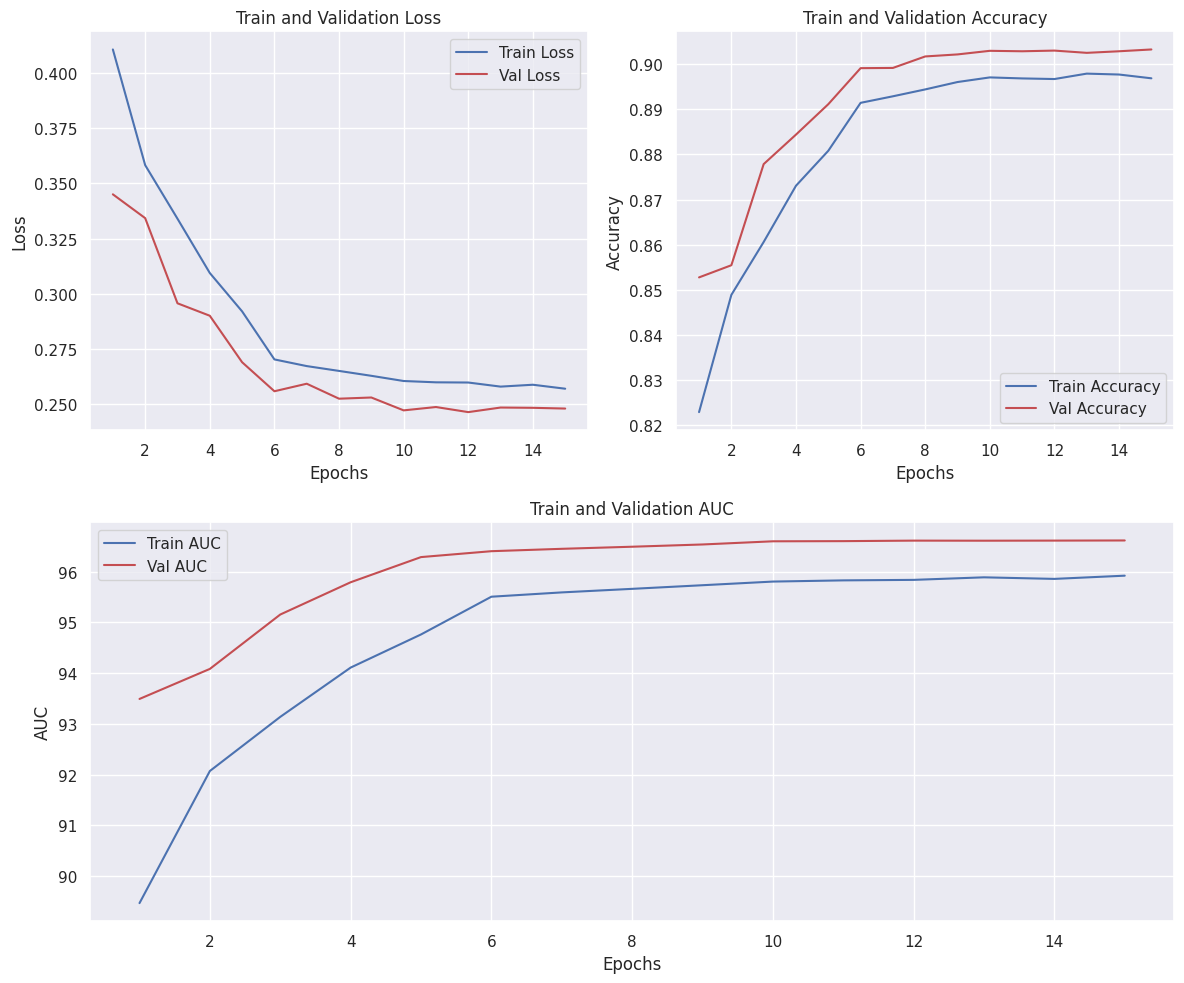

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU